# **Online News Popularity Design**

### <span style="color: red"> **Load Libraries**
Load necessary R libraries.

In [1]:
if (!require("tidyverse")) {install.packages("tidyverse")}
if (!require("forcats")) {install.packages("forcats")}

if (!require("GGally")) {install.packages("GGally")}
if (!require("gridExtra")) {install.packages("gridExtra")}
if (!require("cowplot")) {install.packages("cowplot")}
if (!require("patchwork")) {install.packages("patchwork")}
if (!require("scales")) {install.packages("scales ")}

if (!require("broom")) {install.packages("broom")}
if (!require("car")) {install.packages("car")}
if (!require("leaps")) {install.packages("leaps")}
if (!require("Hmisc")) {install.packages("Hmisc")}
if (!require("psych")) {install.packages("psych")}

if (!require("utils")) {install.packages("utils")}
if (!require("httr")) {install.packages("httr")}

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: cowplot


Attaching package: 'cowplot'


The following object is masked from 'p

In [2]:
# Data Import and Manipulation
library(forcats)
library(tidyverse) # includes: ggplot2, purr and readr

# Data Visualization
library(GGally)
library(gridExtra)
library(cowplot)
library(patchwork)
library(scales)

# Statistical Analysis and Model Interpretation
library(broom)
library(car)
library(leaps)
library(Hmisc)
library(psych)
library(MASS)

# General Utility
library(utils)
library(httr)


Attaching package: 'MASS'


The following object is masked from 'package:patchwork':

    area


The following object is masked from 'package:dplyr':

    select




## <span style="color: red">  Part 1: Preparing and Understanding the Data (Dataset Information)

### <span style="color: red"> 1.1 Introduction to Dataset:

Our dataset is called **"Online News Popularity"** and is selected from UCI Machine Learning Repository. This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls. The goal of creating this dataset is to predict and make inference for the number of shares in news articles of various categories (popularity). pan>

### <span style="color: red">  1.2 Credits:

Acknowledge the source.

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015

>The dataset is from UCI Machine Learning Repository, called "Online News Popularity".  
DOI: https://doi.org/10.24432/C5NS3V  
Authors: Kelwin Fernandes, Pedro Vinagre, Paulo Cortez, Pedro Sernadela.  Published in 2types")</span>

### <span style="color: red">  1.3 Read Data:

Provide both relative and absolute paths for loading the dataset. Read the data into R. 

    Relative Path: "data/OnlineNewsPopularity.csv"
	Absolute Path (GitHub): "https://raw.githubusercontent.com/jasonllai/Stat-301-project-t36/main/OnlineNewsPopularity.csv"

In [3]:
raw_data <- read.csv("https://raw.githubusercontent.com/jasonllai/Stat-301-project-t36/main/OnlineNewsPopularity.csv")
head(raw_data, 3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5,-0.1875,0.0,0.1875,593
2,http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0,0.0000,0.5,0.0000,711
3,http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0,0.0000,0.5,0.0000,1500


### 1.4 Variables:

* `_url_`:     URL of the article (non-predictive)
* `_timedelta_`:     Days between the article publication and the dataset acquisition (non-predictive)
* `_n_tokens_title_`:     Number of words in the title 
* `_n_tokens_content_`:     Number of words in the content
* `_n_unique_tokens_`:     Rate of unique words in the content (rate 1 - 10)
* `_n_non_stop_words_`:      Rate of non-stop words in the content (rate 1 - 10)
* `_n_non_stop_unique_tokens_`:     Rate of unique non-stop words in the content (rate 1 - 10)
* `_num_hrefs_`:     Number of links
* `_num_self_hrefs_`:     Number of links to other articles published by Mashable
* `_num_imgs_`:     Number of images
* `_num_videos_`:     Number of videos
* `_average_token_length_`:      Average length of the words in the content
* `_num_keywords_`:     Number of keywords in the metadata
* `_data_channel_is_lifestyle_`:     Is data channel 'Lifestyle'? (Yes is 1, No is 0)
* `_data_channel_is_entertainment_`:     Is data channel 'Entertainment'? (Yes is 1, No is 0)
* `_data_channel_is_bus_`:     Is data channel 'Business'? (Yes is 1, No is 0)
* `_data_channel_is_socmed_`:     Is data channel 'Social Media'? (Yes is 1, No is 0)
* `_data_channel_is_tech_`:     Is data channel 'Tech'? (Yes is 1, No is 0)
* `_data_channel_is_world_`:     Is data channel 'World'? (Yes is 1, No is 0)
* `_kw_min_min_`:     Number of worst keywords in the artile with min shares
* `_kw_max_min_`:     Number of worst keywords in the artile with max shares
* `_kw_avg_min_`:     Number of worst keywords in the artile with avg shares
* `_kw_min_max_`:     Best keyword (min. shares)
* `_kw_max_max_`:     Best keyword (max. shares)
* `_kw_avg_max_`:     Best keyword (avg. shares)
* `_kw_min_avg_`:     Avg. keyword (min. shares)
* `_kw_max_avg_`:     Avg. keyword (max. shares)
* `_kw_avg_avg_`:     Avg. keyword (avg. shares)
* `_self_reference_min_shares_`:     Min. shares of referenced articles in Mashable
* `_self_reference_max_shares_`:     Max. shares of referenced articles in Mashable
* `_self_reference_avg_sharess_`:     Avg. shares of referenced articles in Mashable
* `_weekday_is_monday_`:     Was the article published on a Monday? (Yes is 1, No is 0)
* `_weekday_is_tuesday_`:     Was the article published on a Tuesday? (Yes is 1, No is 0)
* `_weekday_is_wednesday_`:     Was the article published on a Wednesday? (Yes is 1, No is 0)
* `_weekday_is_thursday_`:     Was the article published on a Thursday? (Yes is 1, No is 0)
* `_weekday_is_friday_`:     Was the article published on a Friday? (Yes is 1, No is 0)
* `_weekday_is_saturday_`:     Was the article published on a Saturday? (Yes is 1, No is 0)
* `_weekday_is_sunday_`:     Was the article published on a Sunday? (Yes is 1, No is 0)
* `_is_weekend_`:     Was the article published on the weekend? (Yes is 1, No is 0)
* `_LDA_00_`:     Closeness to LDA topic 0
* `_LDA_01_`:     Closeness to LDA topic 1
* `_LDA_02_`:     Closeness to LDA topic 2
* `_LDA_03_`:     Closeness to LDA topic 3
* `_LDA_04_`:     Closeness to LDA topic 4
* `_global_subjectivity_`:     Text subjectivity (rate from 0 to 1)
* `_global_sentiment_polarity_`:     Text sentiment polarity (rate from -1 to 1)
* `_global_rate_positive_words_`:     Rate of positive words in the content (rate from 0 to 1)
* `_global_rate_negative_words_`:     Rate of negative words in the content (rate from 0 to 1)
* `_rate_positive_words_`:     Rate of positive words among non-neutral tokens (rate from 0 to 1)
* `_rate_negative_words_`:     Rate of negative words among non-neutral tokens (rate from 0 to 1)
* `_avg_positive_polarity_`:     Avg. polarity of positive words (from 0 to 1)
* `_min_positive_polarity_`:     Min. polarity of positive words (from 0 to 1)
* `_max_positive_polarity_`:     Max. polarity of positive words (from 0 to 1)
* `_avg_negative_polarity_`:     Avg. polarity of negative  words (from 0 to 1)
* `_min_negative_polarity_`:     Min. polarity of negative  words (from 0 to 1)
* `_max_negative_polarity_`:     Max. polarity of negative  words (from 0 to 1)
* `_title_subjectivity_`:     Title subjectivity (from 0 to 1)
* `_title_sentiment_polarity_`:     Title polarity (from -1 to 1)
* `_abs_title_subjectivity_`:     Absolute subjectivity level (from 0 to 1)
* `_abs_title_sentiment_polarity_`:     Absolute polarity level(from 0 to 1)
* `_shares_`:     Number of shares (target) **[RESPONSE VARIABLE]**

### <span style="color: red">  1.5 Research Question:

**Question:** Does the number of links and references to other articles (links and references to other articles, `num_hrefs` and `num_self_hrefs` respectively) and their popularity levels (average shares of the referenced articles, `self_reference_avg_sharess`) including the popularity level of the average keywords used (`kw_avg_avg`) influence the popularity of articles (`shares`) in the entertainment channel differently than in the tech channel?

## <span style="color: red">  Part 2: Data Cleaning and Wrangling

### <span style="color: red">  2.1 Clean Data </span>

#### <span style="color: red">  2.1.1 Select Variables

In [5]:
# Select variables of interest
selected_data <- raw_data[, c(8, 9, 15, 18, 28, 31, 61)]

head(selected_data, 2)

,num_hrefs,num_self_hrefs,data_channel_is_entertainment,data_channel_is_tech,kw_avg_avg,self_reference_avg_sharess,shares
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,4,2,1,0,0,496,593
2,3,1,0,0,0,0,711


#### <span style="color: red">  2.1.2 Missing Values </span>

In [6]:
dims <- dim(selected_data)
rows <- dims[1]
columns <- dims[2]

cat("\nDimensions and missing values:\n")
# Dimensions and NA check
if (sum(is.na(selected_data)) == 0){
    print(paste0("The dataset consists of ", as.character(rows), " observations and ",  as.character(columns), " variables (", 
                 as.character(columns-1), " + 1 response variable). There are no missing values in the dataset."))
}


Dimensions and missing values:
[1] "The dataset consists of 39644 observations and 7 variables (6 + 1 response variable). There are no missing values in the dataset."


#### <span style="color: red"> 2.1.3 Data Types</span>
Peak the data, convert data types appropriately, check for outliers and other inconsistencies. 

In [8]:
# Convert count variables to integer data type 
result <- sapply(selected_data, function(x) all(x == floor(x)))
                 
for (col in names(selected_data)) {
    if (result[col]) {
        selected_data[[col]] <- as.integer(selected_data[[col]])
    }
}
str(selected_data)

'data.frame':	39644 obs. of  7 variables:
 $ num_hrefs                    : int  4 3 3 9 19 2 21 20 2 4 ...
 $ num_self_hrefs               : int  2 1 1 0 19 2 20 20 0 1 ...
 $ data_channel_is_entertainment: int  1 0 0 1 0 0 0 0 0 0 ...
 $ data_channel_is_tech         : int  0 0 0 0 1 1 0 1 1 0 ...
 $ kw_avg_avg                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ self_reference_avg_sharess   : num  496 0 918 0 3151 ...
 $ shares                       : int  593 711 1500 1200 505 855 556 891 3600 710 ...


### <span style="color: red"> 2.2 Wrangling

Data transformation and renaming.

In [9]:
# Clean data
news_data <- selected_data %>%
  pivot_longer(
    cols = starts_with("data_channel_is_"),
    names_to = "channel_type",
    values_to = "value"
  ) %>%
  filter(value == 1) %>%
  mutate(channel_type = case_when(
    channel_type == "data_channel_is_entertainment" ~ "Entertainment",
    channel_type == "data_channel_is_tech" ~ "Tech"),
    channel_type = as.factor(channel_type)
  ) %>%
  dplyr::select(-value)

# Change order of columns (categorical first, response last)
news_data <- news_data[, c(ncol(news_data), 1:(ncol(news_data)-1))]

In [10]:
# Readable column names
news_data <- news_data %>%
    rename(n_links = num_hrefs,
           n_refs = num_self_hrefs,
           avg_keyword_popularity = kw_avg_avg,
           avg_ref_popularity = self_reference_avg_sharess)

In [12]:
head(news_data, 3)
str(news_data)

channel_type,n_links,n_refs,avg_keyword_popularity,avg_ref_popularity,shares
<fct>,<int>,<int>,<dbl>,<dbl>,<int>
Entertainment,4,2,0,496.000,593
Entertainment,9,0,0,0.000,1200
Tech,19,19,0,3151.158,505


tibble [14,403 × 6] (S3: tbl_df/tbl/data.frame)
 $ channel_type          : Factor w/ 2 levels "Entertainment",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ n_links               : int [1:14403] 4 9 19 2 20 2 24 21 20 5 ...
 $ n_refs                : int [1:14403] 2 0 19 2 20 0 24 19 20 2 ...
 $ avg_keyword_popularity: num [1:14403] 0 0 0 0 0 0 0 0 0 0 ...
 $ avg_ref_popularity    : num [1:14403] 496 0 3151 8500 3151 ...
 $ shares                : int [1:14403] 593 1200 505 855 891 3600 17100 2800 445 783 ...


## <span style="color: red"> Part 3: Exploratory Data Analysis (EDA)

- Conduct preliminary correlation analysis to understand relationships between variables.
- Summarize main characteristics of the response variable `shares` and our main categorical variable `channel_types` through visualization and statistics.

We start by graphically visualizing the distributions and spread of `shares` in different channel types from the `channel_type` variable using side-by-side boxplots. And to better understand the dispersion of `shares`, we will create a histogram and visualize the distrbituion of shares. 

### <span style="color: red"> 3.1 Basic Summary Statistics

#### <span style="color: red"> 3.1.1 Measures of Central Tendency and Dispersion

In [13]:
cat("\nMeasures of Central Tendency and Measures of Dispersion:\n")
description <- round(psych::describe(news_data), 2)

description$variance <- description$sd^2

round(slice(description, 2:n()), 2)


Measures of Central Tendency and Measures of Dispersion:


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,variance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
n_links,2,14403,10.04,10.92,7.00,8.08,4.45,0,304.00,304.00,5.22,66.97,0.09,119.25
n_refs,3,14403,4.08,4.31,3.00,3.42,2.97,0,116.00,116.00,4.76,53.33,0.04,18.58
avg_keyword_popularity,4,14403,2946.97,954.50,2825.76,2864.69,625.36,0,36023.42,36023.42,5.98,137.54,7.95,911070.25
avg_ref_popularity,5,14403,6150.63,24658.12,2466.67,3144.38,2310.38,0,663600.00,663600.00,18.60,434.07,205.46,608022881.93
shares,6,14403,3022.41,8472.88,1400.00,1825.69,889.56,36,663600.00,663564.00,38.33,2649.78,70.60,71789695.49


#### <span style="color: red"> 3.1.2 Outliers

1. The response variable `shares` is extremely skewed. Suggesting the presence of outliers. 
- **mean** = 3022.41
- **variance** = 71789695.49
- **skew** = 38.33
- **kurtosis** = 2649.78

Since we don't have a specialist who can guide us through detecting outliers, we will be <span style="color: red"> investigating each extreme value ourselves </span> to see if they are valid data or needs to be removed. This can be;
- An article that doesn't belong to Tech or Entertainment, and should be in one of the other categories that aren't of our interest (World, Social Media, Business, Lifestyle)
- A data entry error (such as an empty article, or link that doesn't work)

In [19]:
top_shares <- head(sort(news_data$shares, decreasing = TRUE), 20)
# max_shares

for (t in top_shares) {
    # list for the links
    top_links = list()
    # pull links for each smax share
    i <- raw_data %>% filter(shares == t) %>% pull(url)
    top_links[[paste0("shares: ", t)]] <- i

    print(top_links)
}

$`shares: 663600`
[1] "http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/"

$`shares: 210300`
[1] "http://mashable.com/2013/07/12/sprint-unlimited-data-for-life/"

$`shares: 197600`
[1] "http://mashable.com/2013/12/25/xbox-one-getting-started/"

$`shares: 193400`
[1] "http://mashable.com/2013/12/26/mcdonalds-kills-mcresource-line/"

$`shares: 138700`
[1] "http://mashable.com/2013/08/28/6000-video-launched-helloflo/"

$`shares: 112600`
[1] "http://mashable.com/2014/02/10/flappy-bird-typing-tutor/"

$`shares: 109500`
[1] "http://mashable.com/2014/10/14/sandworm-russian-hackers-nato-with-microsoft-bug-ukraine-nato/"

$`shares: 109100`
[1] "http://mashable.com/2014/05/28/lookout-theft-protection/"

$`shares: 104100`
[1] "http://mashable.com/2013/07/05/google-field-trip-july-free/"
[2] "http://mashable.com/2013/12/02/jane-austen-single-quotes/"  

$`shares: 98500`
[1] "http://mashable.com/2014/09/10/australian-tested-ebola-virus/"

$`shares: 98000`
[1] "http://mashable.com/

After investigating each article with top shares, we saw that <span style="color: red"> there are no data entry errors </span> and most articles clearly represented their designated channels. We will **keep all data** and continue the analysis. 

#### <span style="color: red"> 3.1.3 Overdispersion Test

We will be conducting an _**overdispersion test**_ based on the residuals of a Poisson regression model, to determine if _**Poisson Regression**_ or _**Negative Binomial Regression**_ is a better fit for our analysis.

In [18]:
# Fit a Poisson regression model
poisson_model <- glm(shares ~ channel_type + n_links + n_refs + avg_keyword_popularity + avg_ref_popularity, 
                     family = poisson(link = "log"), data = news_data)

# Get the predicted counts from the Poisson model
predicted_counts <- predict(poisson_model, type = "response")

# Calculate the quantity for testing overdispersion according to the given formula
news_data$overdispersion_test <- (news_data$shares - predicted_counts)^2 - news_data$shares

# Fit an OLS model without intercept to test for overdispersion
overdispersion_model <- lm(overdispersion_test ~ predicted_counts - 1, data = news_data)

# Check the summary for p-value
summary(overdispersion_model)


Call:
lm(formula = overdispersion_test ~ predicted_counts - 1, data = news_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.261e+09 -2.195e+08 -2.009e+08 -1.843e+08  4.351e+11 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
predicted_counts    71342       8581   8.314   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.687e+09 on 14402 degrees of freedom
Multiple R-squared:  0.004777,	Adjusted R-squared:  0.004708 
F-statistic: 69.13 on 1 and 14402 DF,  p-value: < 2.2e-16


Since the <span style="color: red">  **p-value** is low (p < 2e-16)</span>, it suggests that  <span style="color: red">  there is _**overdispersion**_ </span> in the data. Thus, we'll be using <span style="color: red">  _**Negative Binomial Regression**_.</span>

#### <span style="color: red"> 3.1.4 Zero-inflated test 


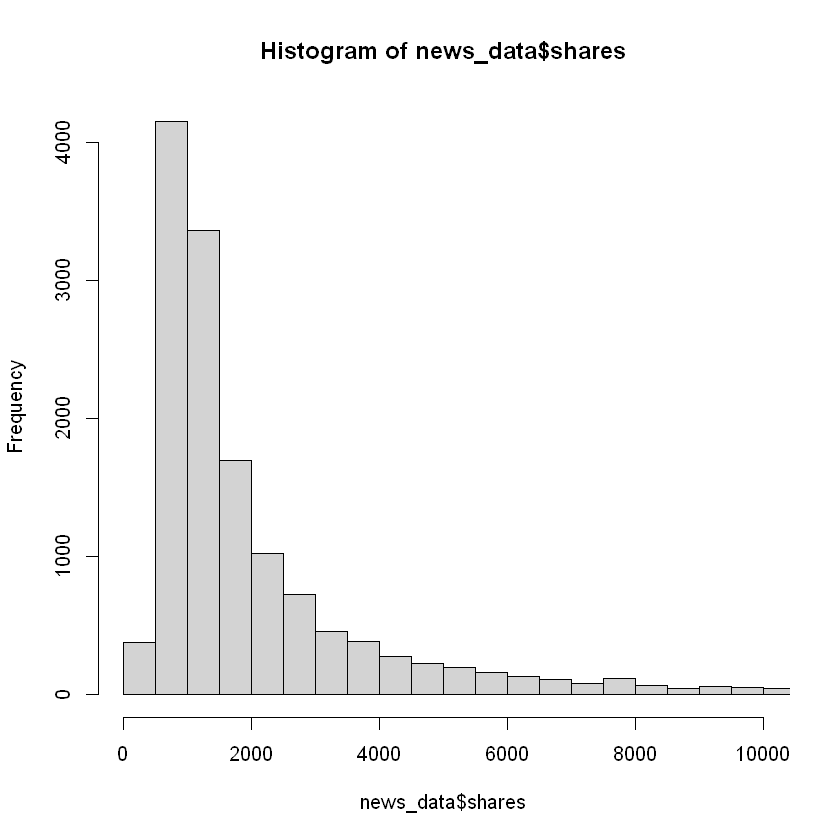

In [26]:
hist(news_data$shares, breaks = 1000, xlim = c(0,10000))

In [28]:
table(news_data$shares)


    36     47     49     50     51     57     58     59     64     65     80 
     1      1      2      1      1      1      1      1      2      1      1 
    82     84     86     88     90     92     95     98    104    109    116 
     2      1      1      2      1      1      1      1      1      1      1 
   119    123    137    138    140    144    158    162    164    168    171 
     1      1      1      1      1      1      1      1      1      1      1 
   176    181    183    192    199    201    202    205    206    211    213 
     1      2      1      1      1      1      1      2      1      1      1 
   217    218    220    221    223    224    228    232    233    242    250 
     2      1      1      1      1      1      1      1      1      1      1 
   256    257    262    264    269    279    280    282    285    286    287 
     1      1      2      2      1      1      1      1      1      2      1 
   291    294    295    302    303    305    313    319    322 

In [20]:
# Step 1: Calculate the observed proportion of zeros
observed_zeros <- sum(news_data$shares == 0) / nrow(news_data)

# Step 2: Fit a Poisson model
poisson_model <- glm(shares ~ channel_type + n_links + n_refs + avg_keyword_popularity + avg_ref_popularity, 
                     family = poisson(link = "log"), data = news_data)

# Step 3: Calculate the expected proportion of zeros under the Poisson model
predicted_counts <- predict(poisson_model, type = "response")
expected_zeros <- sum(dpois(0, lambda = predicted_counts)) / nrow(news_data)

# Step 4: Compare the observed and expected proportions of zeros
observed_vs_expected <- data.frame(observed = observed_zeros, expected = expected_zeros)
print(observed_vs_expected)

  observed expected
1        0        0


Seems we don't have any 0 values for `shares`, thus we won't be worrying about this problem.

### <span style="color: red"> 3.2 Linearity

https://chat.openai.com/c/1dd549cf-fc23-4d51-b20a-535dec98731a 

In [99]:
eda_data <- news_data[,-1]

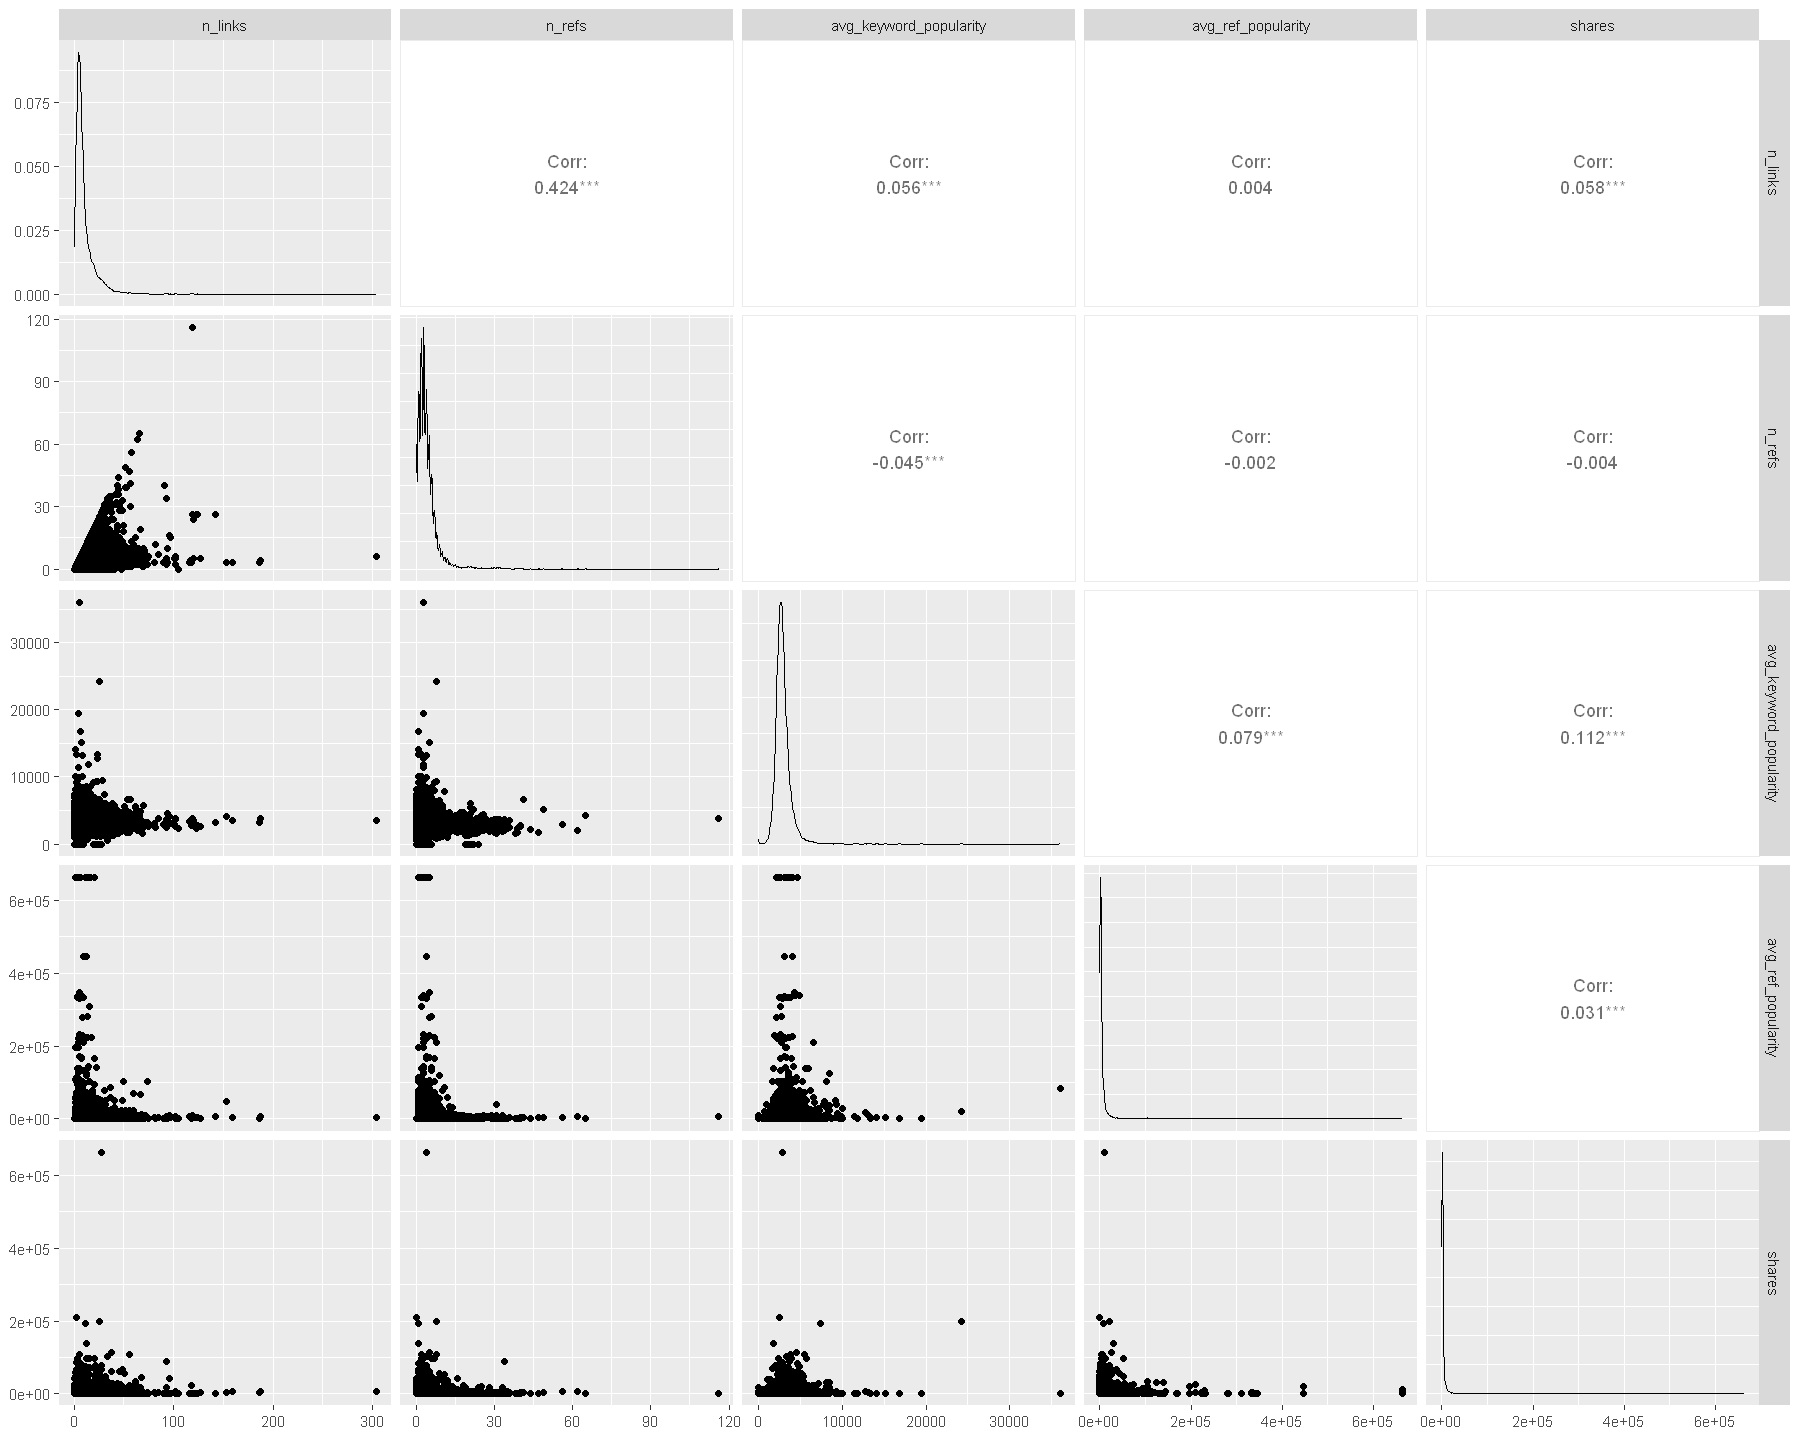

In [100]:
options(repr.plot.width = 15, repr.plot.height = 12)
ggpairs(eda_data, progress = FALSE)

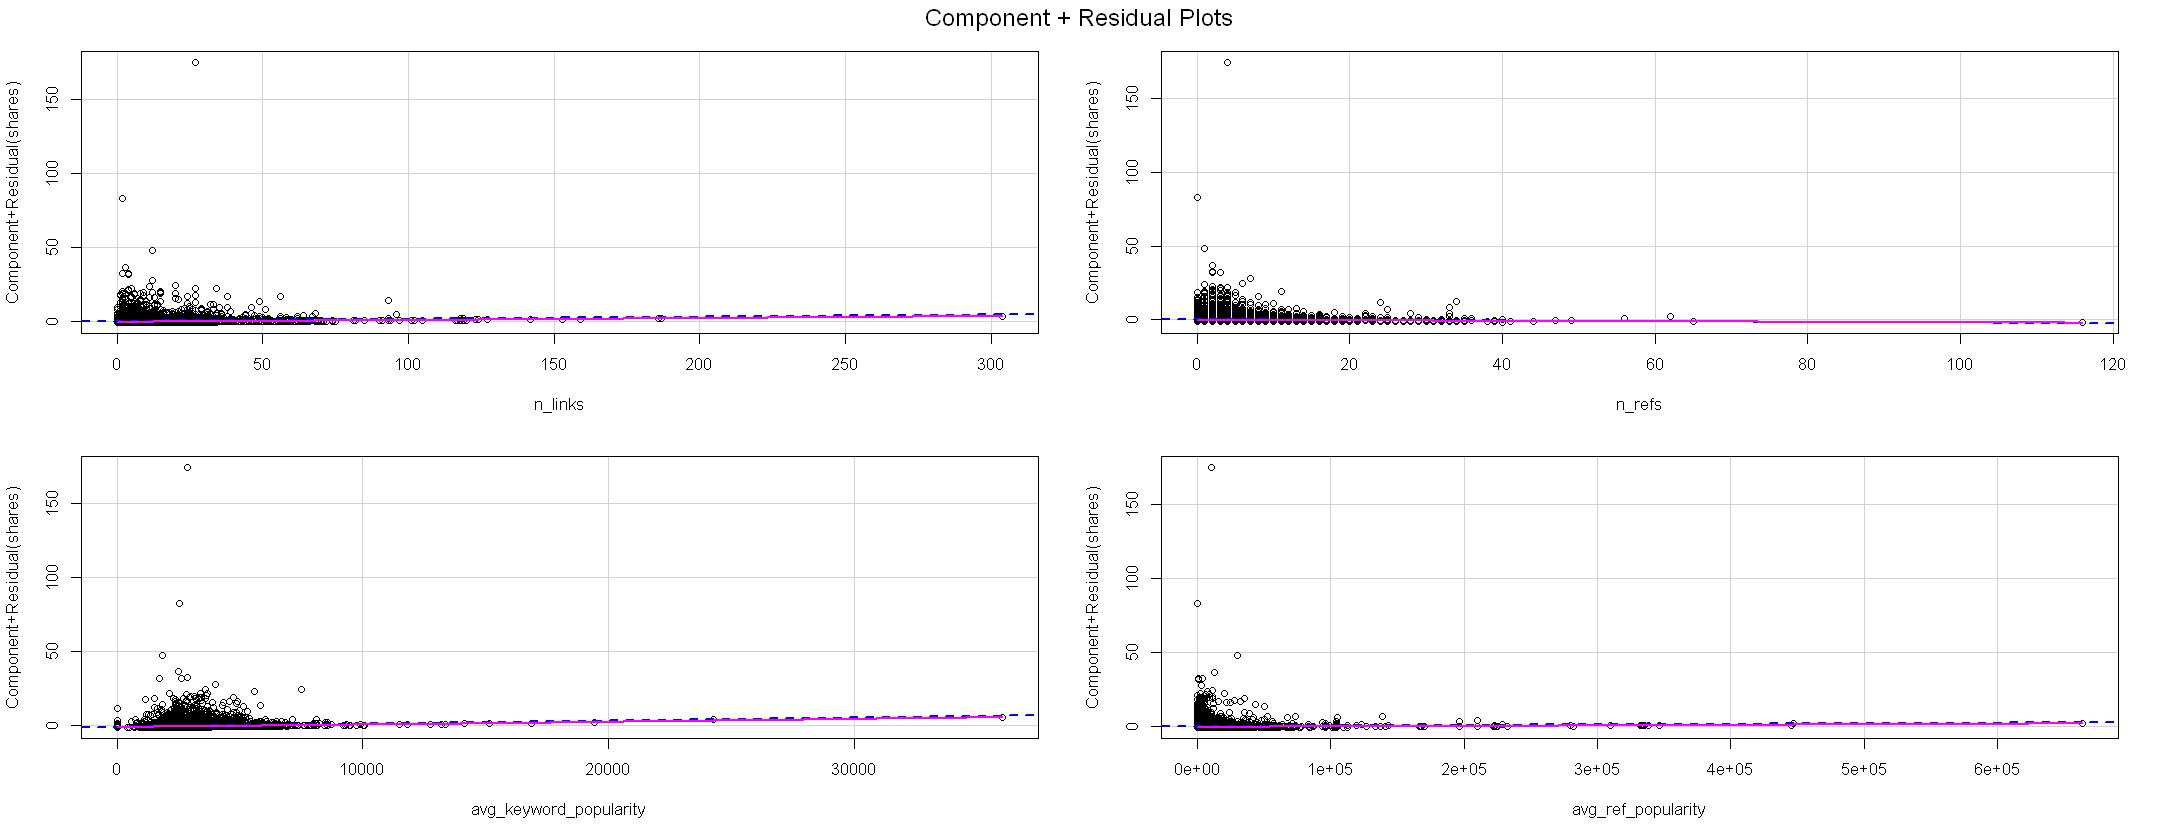

In [101]:
options(repr.plot.width = 18, repr.plot.height = 7)
nb_model <- glm.nb(shares~., data = eda_data)
crPlots(nb_model)

### <span style="color: red"> 3.3 Multicollinearity

#### <span style="color: red"> Correlation Matrix

**NOTE:** We will only be displaying correlations that are above 0.5, any correlation below 0.5 will be assigned NA to highlight the significant correlations.

In [129]:
# Create correlation matrix
cat("\nCorrelation Matrix (>.2):\n")
cor_matrix <- cor(news_data[,-1])
threshold <- 0.2

cor_matrix[abs(cor_matrix) < threshold] <- NA
round(cor_matrix, 2)


Correlation Matrix (>.2):


,n_links,n_refs,avg_keyword_popularity,avg_ref_popularity,shares,log_shares
n_links,1.00,0.42,NA,NA,NA,NA
n_refs,0.42,1.00,NA,NA,NA,NA
avg_keyword_popularity,NA,NA,1,NA,NA,NA
avg_ref_popularity,NA,NA,NA,1,NA,NA
shares,NA,NA,NA,NA,1.00,0.55
log_shares,NA,NA,NA,NA,0.55,1.00


#### Variance Inflation Factor (VIF) 

In [128]:
lm_vif_model <- lm(shares ~., data = news_data)

vif <- vif(lm_vif_model)

cat("\nVIF Analysis Scores:\n")
print(round(vif, 3))


VIF Analysis Scores:
          channel_type                n_links                 n_refs 
                 1.125                  1.253                  1.261 
avg_keyword_popularity     avg_ref_popularity             log_shares 
                 1.091                  1.012                  1.066 


#### <span style="color: red"> Observations:

1. The response variable `shares` is very skewed. We will use Negative Binomial Regression as well as Poisson Regression.

2. Altough it is hard to make conlcusions from visualizations since the dataset is very large, there seems to be a linear relationship, yet the relationships appear to be quite weak for all explanatroy variables. 

3. Results indicate that _multicollinearity_ is not a problem anymore since all VIF scores are relatively low (<1.3)

In _**Poisson regression**_ it's crucial that the mean equals the variance for the count data. In this case, this assumption is violated. 

Thus, we will use **_Negative Binomial Regression_** for the analysis since it better handles for _overdispersion_.  

### <span style="color: red"> 3.4 EDA Plots

#### <span style="color: red"> Density Plot of Response (shares)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
"Removed 376 rows containing non-finite values (`stat_density()`)."


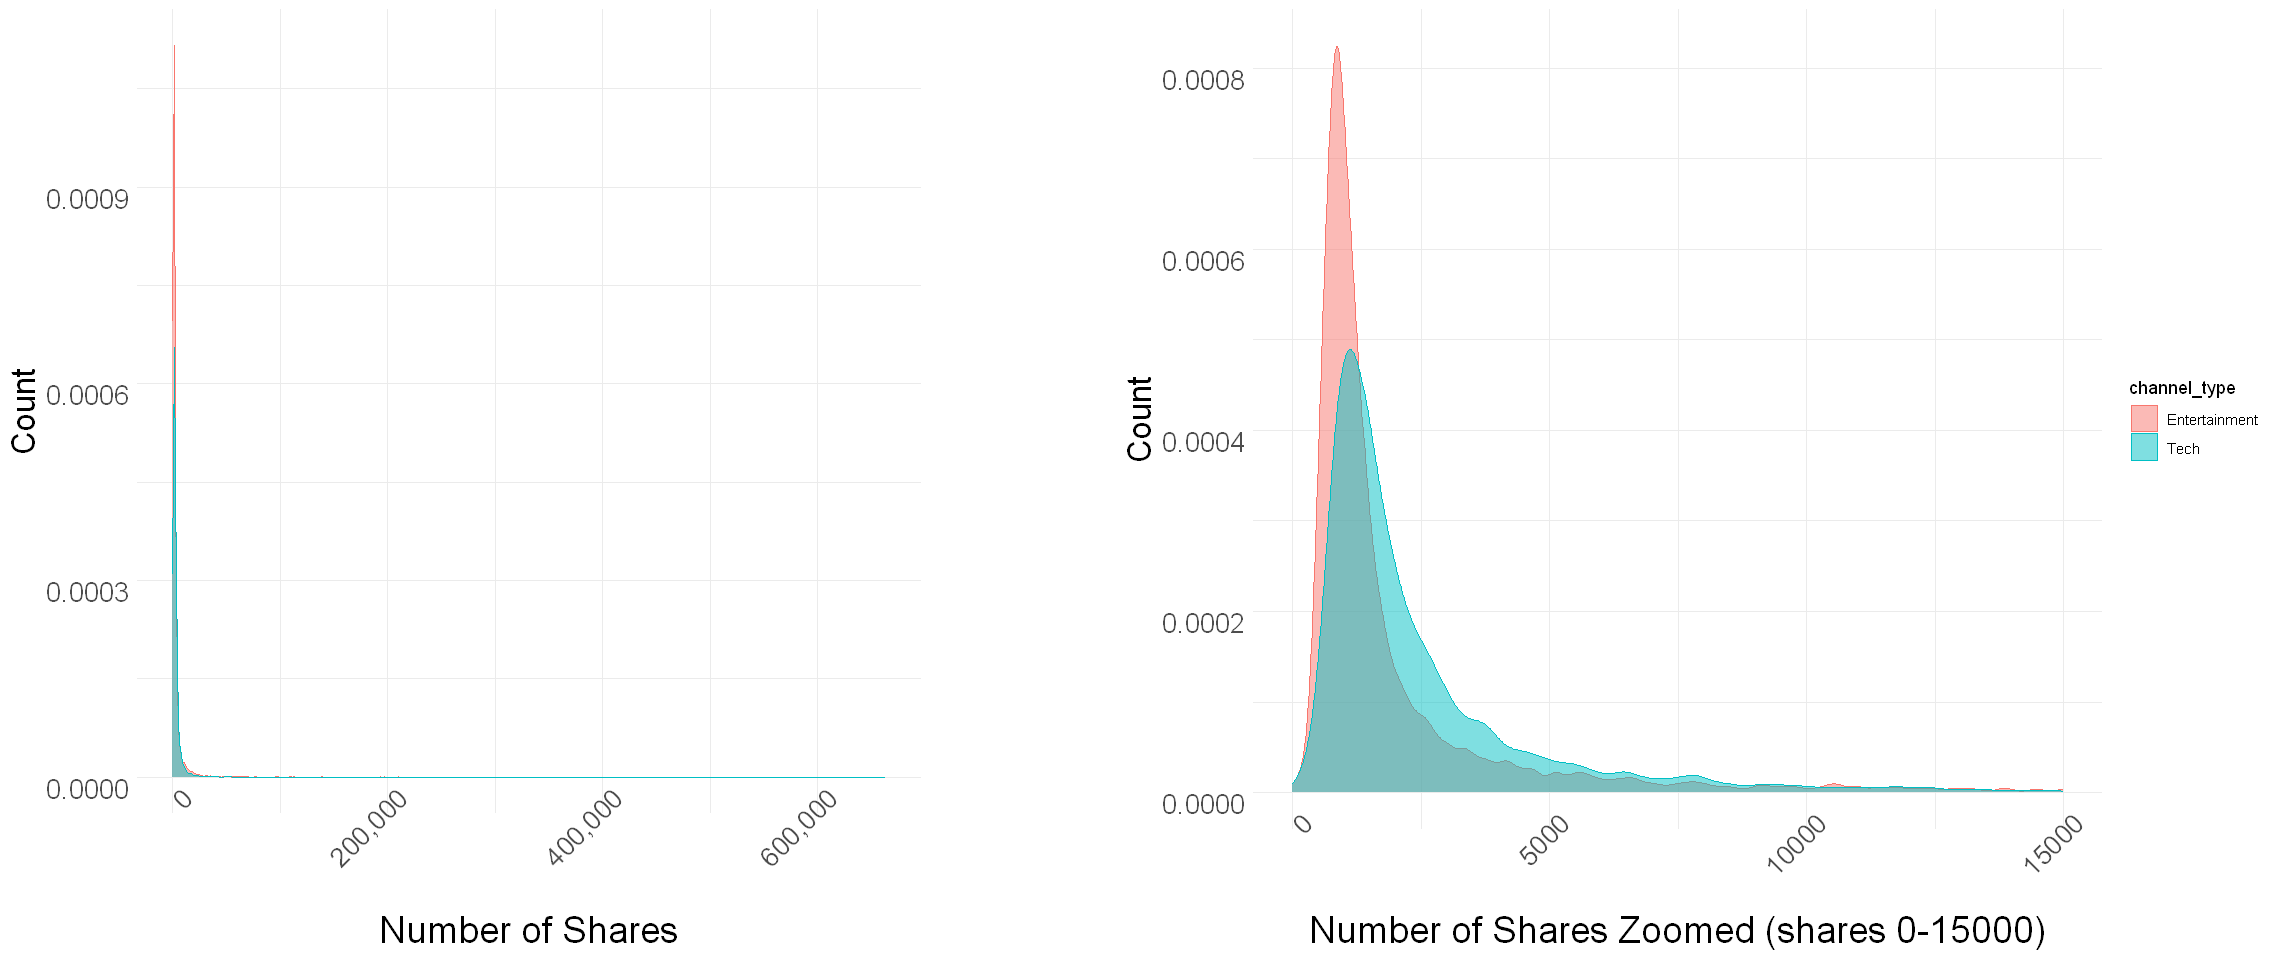

In [105]:
# Density plot of shares
density_plot <- news_data %>%
    ggplot(aes(x=shares, color = channel_type, fill = channel_type)) +
    geom_density(alpha = .5) +
    scale_y_continuous(labels = scales::comma) +
    scale_x_continuous(labels = scales::comma) +
    labs(x="Number of Shares", y="Count") +
    theme_minimal() +
    theme(axis.title.x = element_text(size = 22),
          axis.title.y = element_text(size = 20),
          axis.text.x = element_text(angle = 45, vjust = 1.5, hjust=1, size = 16),
          axis.text.y = element_text(angle = 0, vjust = 1, hjust=1.5, size = 16),
          legend.position = "none"
         )

# Density plot of shares, zoomed in
density_plot_zoom <- density_plot +
    xlim(0, 15000) +
    labs(x="Number of Shares Zoomed (shares 0-15000)") +
    theme(legend.position = "right") 


# Set plot size for a specific plot
options(repr.plot.width = 19, repr.plot.height = 8)
# Create an empty plot for spacing
spacer <- ggplot() + theme_void()
# Use plot_grid to arrange the plots side by side
plot_grid(density_plot, spacer, density_plot_zoom, ncol = 3, rel_widths = c(1, 0.2, 1.25))

We can see some extreme values, with **some articles reaching over 500k shares** which makes it hard to visualize the statistics of the rest of the data. 

This heavy right skewed distribution isn't surprising due to the nature of the `shares` variable. The number of shares of a given article can't hold a negative value. It can either be not shared at all, with 0 shares, or any integer value [0, $+inf$]. Thus, naturally we expect a right skewed data. We assume that these extreme values are geniune data, and not data-entry errors.

We'll try to deal with this these extreme values and the right skew by applying a **log transformation** to the `shares` column. We will visualize the response variable after the transformation. We won't use logarithmic shares for the regression analysis. 

#### <span style="color: red"> Boxplot of Response (shares per channel type)

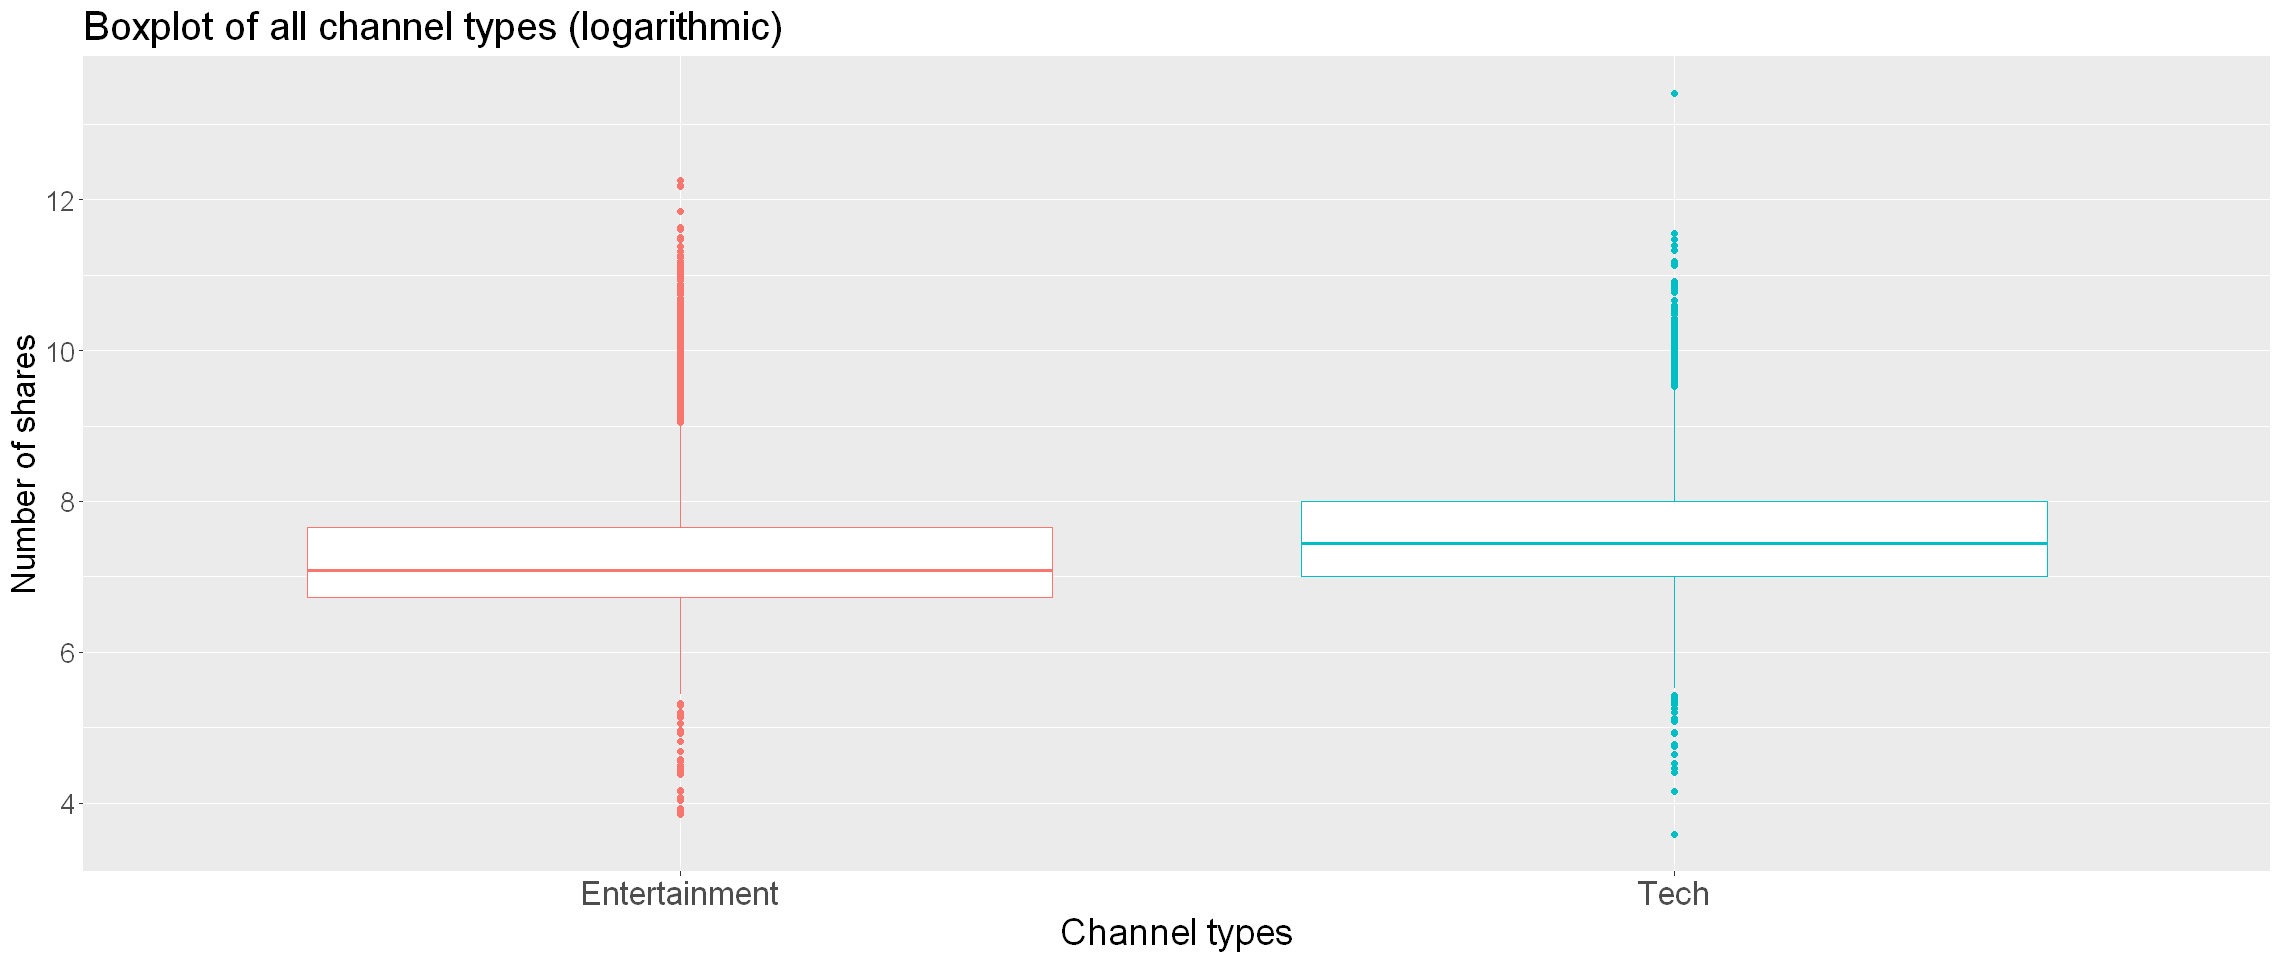

In [124]:
# Applying log transformation
news_data$log_shares <- log(news_data$shares)

# Box plot of the channel_types on Logarithmic shares
box1_log <- news_data %>% ggplot(aes(x = channel_type, y = log_shares, color = channel_type)) +
    geom_boxplot() +
    scale_y_continuous(labels = comma) +
    labs(title = "Boxplot of all channel types (logarithmic)",
         y = "Number of shares",
         x = "Channel types",
         color = "Channel Types") +
    theme(text = element_text(size = 20),
          axis.title.x = element_text(size = 22),
          axis.title.y = element_text(size = 20),
          axis.text.x = element_text(size = 20),
          legend.position="none")
box1_log

#### <span style="color: red"> Observations:

1. By using the logarithmic shares, we see that the **outliers seem very significant**.
2. Tech channel seems to have more shares overall. We will analyize if the effects of the explanatory variables  differ singificantly between these channels. 

We'll investigate these extreme values and the distribution of the data by generating some summary statistics using `describe()` and `quantiles` functions.

In [123]:
cat("\nDescribe the general distribtuion:\n")
describe(news_data$shares)
cat("\nExhibit the quantiles:\n")
quantile(x = news_data$shares, probs = seq(0, 1, by = 0.05))


Describe the general distribtuion:


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,14403,3022.406,8472.879,1400,1825.686,889.56,36,663600,663564,38.32556,2649.775,70.59997



Exhibit the quantiles:


0%     5%    10%    15%    20%    25%    30%    35%    40%    45%    50% 
    36    585    709    794    868    942   1000   1100   1200   1300   1400 
   55%    60%    65%    70%    75%    80%    85%    90%    95%   100% 
  1600   1700   2000   2300   2700   3200   4100   5700   9800 663600